# Previsão de Votação de Deputados

Modelos preditivos de regressão utilizando a biblioteca [scikit learn](http://scikit-learn.org/stable/index.html) para a predição dos votos de deputados federais considerando dados das últimas eleições.

Tutorial utilizado como base [Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models)


In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Importando dados do arquivo e visualizando as 3 primeiras linhas

In [2]:
eleicoes = pd.read_csv('/home/lsp/dados/am/eleicoes_2006_a_2010.csv')
eleicoes[:3]

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.0,2766.666667,NaN,...,14,14,16583.60,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.0,1755.846154,6625.0,...,24,23,20325.99,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.8,9257.550000,2250.0,...,123,108,146011.70,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428


A partir do livro Análise Multivariada de Dados (Hair, Black, Babin, Anderson e Tathan) 6ª edição, existem 6 etapas para a construção de modelos multivariados:
- 1 Definição do problema
- 2 Definição do plano de análise
- 3 Avaliação das suposições
- 4 Estimação do modelo
- 5 Interpretação da variáveis
- 6 Validação

O objetivo de trazer essas etapas é pensar em como elas são abordados nesse caso prático de regressão.
- 1 Definição do problema: Predição da quantidade de votos de um candidato a deputado com base em algumas informações da campanha.
- 2 Definição do plano de análise:
    - Análise dos dados
    - Correções e transformações necessárias
    - Identificar quais atributos são mais relevantes
    - Descrever suposições a partir da etapa anterior
- 3 Avaliação das suposições
- 4 Estimação do modelo
- 5 Interpretação da variáveis
- 6 Validação

## Observando os dados

In [3]:
eleicoes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ano,7330.0,2.008151e+03,1.994416e+00,2006.00,2006.000000,2.010000e+03,2.010000e+03,2.010000e+03
sequencial_candidato,7330.0,9.179127e+10,9.924629e+10,10001.00,10565.000000,5.000000e+10,1.900000e+11,2.700000e+11
quantidade_doacoes,7330.0,2.831010e+01,1.186551e+02,1.00,4.000000,9.000000e+00,2.400000e+01,6.997000e+03
quantidade_doadores,7330.0,2.581746e+01,1.036594e+02,1.00,4.000000,8.000000e+00,2.200000e+01,5.800000e+03
total_receita,7169.0,1.544899e+05,3.953880e+05,0.00,2700.000000,1.209578e+04,8.929956e+04,4.539727e+06
media_receita,7169.0,5.485598e+03,1.411653e+04,0.00,622.857143,1.540543e+03,4.662500e+03,5.001800e+05
recursos_de_outros_candidatos/comites,4940.0,3.002116e+04,1.280932e+05,2.41,1180.000000,3.522570e+03,1.327550e+04,3.664205e+06
recursos_de_pessoas_fisicas,4647.0,3.730931e+04,8.215398e+04,0.03,2000.000000,9.000000e+03,3.756234e+04,1.403049e+06
recursos_de_pessoas_juridicas,3354.0,1.761195e+05,3.517541e+05,0.00,3422.500000,2.612000e+04,1.755218e+05,3.178226e+06
recursos_proprios,4942.0,3.914169e+04,1.839980e+05,0.00,1177.232500,5.000000e+03,2.027459e+04,5.525600e+06


Atributos numéricos:
quantidade_doacoes	
- quantidade_doadores	
- total_receita	
- media_receita	
- recursos_de_outros_candidatos/comites	
- recursos_de_pessoas_fisicas	
- recursos_de_pessoas_juridicas	
- recursos_proprios	
- quantidade_despesas	
- quantidade_fornecedores	
- total_despesa	
- media_despesa		
- votos

Atributos categórigos:
- ano	
- sequencial_candidato	
- nome	
- uf	
- partido	
- cargo	
- sexo	
- grau	
- estado_civil	
- ocupacao	

**Como saber quais variáveis normalizar e quais variáveis utilizar em um modelo?**


## Distribuição das variáveis 

### Ao observar a sitruibuição do atributo total_receita podemos obeservar que ele está enviesado para a direta. Para resolver, utilizamos a transformação logarítmica.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95b3a3e438>]], dtype=object)

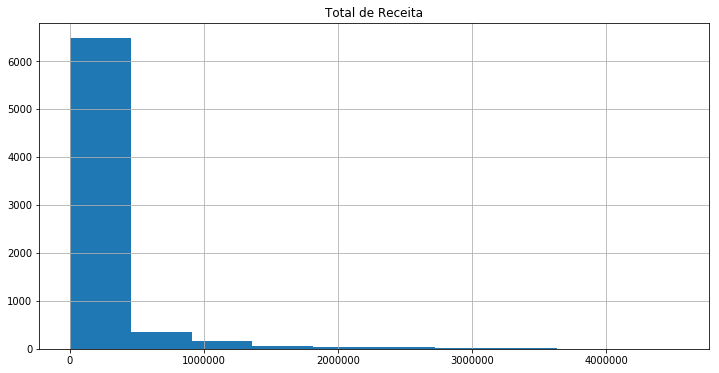

In [4]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
var = pd.DataFrame({"Total de Receita":eleicoes['total_receita']})

var.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95abc1db38>]], dtype=object)

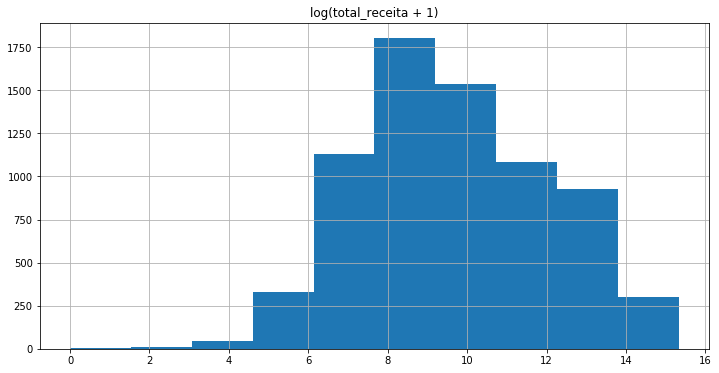

In [5]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
var = pd.DataFrame({"log(total_receita + 1)":np.log1p(eleicoes['total_receita'])})

var.hist()

### Também é possível observar um enviesamento no atributo votos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95aba33940>]], dtype=object)

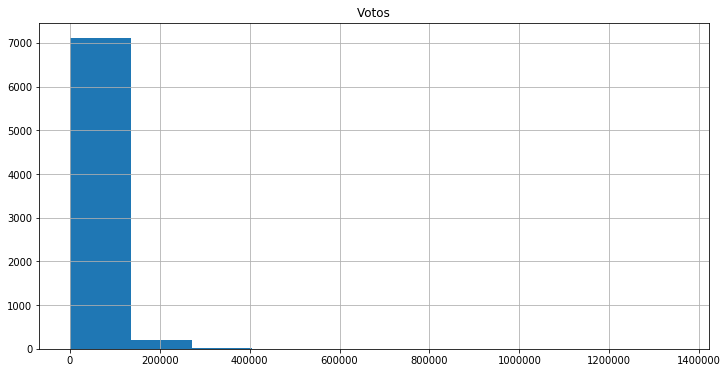

In [6]:
var = pd.DataFrame({"Votos":eleicoes['votos']})

var.hist()

### E para lidar com isso vamos fazer a mesma transformação anterior. Vamos replicar essa transformação para outras variáveis numéricas do conjunto de dados.

## Transformando variáveis numéricas

Selecionando as variáveis numéricas

In [7]:
numeric_features = eleicoes.dtypes[eleicoes.dtypes != "object"].index
eleicoes[numeric_features][:5]

,ano,sequencial_candidato,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,votos
0,2006,10001,6,6,16600.00,2766.666667,NaN,9000.0,6300.00,1300.0,14,14,16583.60,1184.542857,8579
1,2006,10002,13,13,22826.00,1755.846154,6625.0,15000.0,1000.00,201.0,24,23,20325.99,883.738696,2757
2,2006,10002,17,16,148120.80,9257.550000,2250.0,34150.0,62220.80,59500.0,123,108,146011.70,1351.960185,17428
3,2006,10002,6,6,3001.12,500.186667,NaN,1150.0,1101.12,750.0,8,8,3001.12,375.140000,1193
4,2006,10003,48,48,NaN,NaN,NaN,50878.0,NaN,68942.0,133,120,116416.64,970.138667,29401


Verificando o viés das variáveis numéricas

In [8]:
skewed_features = eleicoes[numeric_features].apply(lambda x: x.dropna().skew())
skewed_features

ano                                      -0.151624
sequencial_candidato                      0.447496
quantidade_doacoes                       39.982260
quantidade_doadores                      37.541762
total_receita                             4.599988
media_receita                            12.105833
recursos_de_outros_candidatos/comites    13.892631
recursos_de_pessoas_fisicas               6.800271
recursos_de_pessoas_juridicas             3.431190
recursos_proprios                        15.782559
quantidade_despesas                       8.546077
quantidade_fornecedores                   8.424869
total_despesa                             4.534959
media_despesa                            66.379222
votos                                     6.669571
dtype: float64

Selecionando os atributos com viés acima de 0.75

In [9]:
skewed_features = skewed_features[skewed_features > 0.75]
skewed_features

quantidade_doacoes                       39.982260
quantidade_doadores                      37.541762
total_receita                             4.599988
media_receita                            12.105833
recursos_de_outros_candidatos/comites    13.892631
recursos_de_pessoas_fisicas               6.800271
recursos_de_pessoas_juridicas             3.431190
recursos_proprios                        15.782559
quantidade_despesas                       8.546077
quantidade_fornecedores                   8.424869
total_despesa                             4.534959
media_despesa                            66.379222
votos                                     6.669571
dtype: float64

Aplicando transformação logarítmica em todos os dados selecionados em skewed_features

In [10]:
skewed_features = skewed_features.index

eleicoes[skewed_features] = np.log1p(eleicoes[skewed_features])
eleicoes[numeric_features][:5]

,ano,sequencial_candidato,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,votos
0,2006,10001,1.945910,1.945910,9.717218,7.925760,NaN,9.105091,8.748464,7.170888,2.708050,2.708050,9.716230,7.077956,9.057189
1,2006,10002,2.639057,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,3.218876,3.178054,9.919705,6.785292,7.922261
2,2006,10002,2.890372,2.833213,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,4.820282,4.691348,11.891449,7.210050,9.765891
3,2006,10002,1.945910,1.945910,8.007074,6.216979,NaN,7.048386,7.004991,6.621406,2.197225,2.197225,8.007074,5.929961,7.085064
4,2006,10003,3.891820,3.891820,NaN,NaN,NaN,10.837206,NaN,11.141035,4.897840,4.795791,11.664939,6.878469,10.288818


## Transformando variáveis categóricas

Verificando a quantidade de linhas e colunas do DataFrame antes da tranformação das variáveis categóricas

In [11]:
eleicoes.shape

(7330, 23)

Convertendo atributos categóricos em valores modelo

In [12]:
eleicoes = pd.get_dummies(eleicoes)
eleicoes.shape

(7330, 7038)

Ao converter os atributos categóricos a quantidade de colunas cresce bastante pois ao fazer a transformação cada campo categórico se torna uma coluna que é preenchida com 0 ou 1 quando aquele valor ocorre ou não.

In [13]:
eleicoes[:3]

,ano,sequencial_candidato,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,...,"ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS",ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
0,2006,10001,1.945910,1.945910,9.717218,7.925760,NaN,9.105091,8.748464,7.170888,...,0,0,0,0,0,0,1,0,0,0
1,2006,10002,2.639057,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,...,0,0,0,0,0,0,0,0,0,0
2,2006,10002,2.890372,2.833213,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,...,0,0,0,0,0,0,0,0,0,0


## Transformando atributos com valores NaN: 
Opção 1 - Preencher os valores NA's com a média de valores de cada coluna

In [14]:
eleicoes_mean = eleicoes.fillna(eleicoes.mean())

Opção 2 - Preencher valores NaN com 0

In [15]:
eleicoes_zero = eleicoes.fillna(0)

## Separando dados
Vamos utilizar um `DataFrame` montado de forma aleatória tanto com dados de 2006 quanto com dados de 2010.
E utilizar para a transformação dos valores NaN a opção 1 que preenche os valores NA's com a média de valores de cada coluna.

In [16]:
eleicoes = eleicoes_mean
n = int(7330/2)
sample = eleicoes.sample(n=n)
eleicoes.shape

(7330, 7038)

Retirando dos dados o atributo `sequencial_candidato` pois é uma informação que denota apenas um id no conjunto dos dados. E retirando os atributos referente a média (`media_receita`, `media_despesa`), pois acredito que essa medida agregada, quando analisadas junto ao valor total e a quantidade, pode prejudicar o modelo por não serem juntas (média, total e quantidade) medidas com crescimento proporcional.

In [17]:
sample = sample.drop(['sequencial_candidato', 'media_receita', 'media_despesa'], axis=1)

In [18]:
sample[(sample.ano==2006)].shape

(1728, 7035)

In [19]:
sample[(sample.ano==2010)].shape

(1937, 7035)

In [20]:
train = sample[:int(n/2)]
test = sample[int(n/2):]

## Criando matrizes para o sklearn

In [21]:
x_train = train.drop('votos', axis=1)
y_train = train['votos']

x_test = test.drop('votos', axis=1)
y_test = test['votos']

x_all = sample.drop('votos', axis=1)
y_all = sample['votos']

Função para criar visualização do Resíduo X Predições

In [96]:
def vis_residuos_vs_predicoes(y_pred, y_real, titulo):
    matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
    predicoes = pd.DataFrame({"predicoes":y_pred, "valor_real":y_real})
    predicoes["residuos"] = predicoes["valor_real"] - predicoes["predicoes"]
    predicoes.plot(x = "predicoes", y = "residuos",kind = "scatter")
    plt.title(titulo)


# Modelos de Regressão

## 1 - Regressão sem regularização

Importando módulos necessários

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, median_absolute_error

Treinando o modelo com os dados de treino

In [23]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predizendo os valores de y para dos conjunto de teste

In [85]:
y_pred_model_reg = reg.predict(x_test)
y_pred_model_reg

array([  7.99944109,   8.11780229,   8.71432984, ...,  13.28528069,
         8.83738128,   5.43864748])

#### Calculando métricas para avaliação do modelo

**Coeficientes calculados para os atributos**

In [25]:
reg.coef_

array([-0.12995877, -0.43079614,  0.94127631, ...,  0.        ,
       -0.30674874, -0.15482578])

**MSE** - Média do quadrado do erro

In [86]:
mse = mean_squared_error(y_test, y_pred_model_reg)
mse

2.1555409459129322

### RMSE - Regressão sem regularização

In [27]:
np.sqrt(mse)

1.4681760609385144

**R²**

In [148]:
r2_score(y_test, y_pred_model_reg)

0.44631584708034466

In [88]:
explained_variance_score(y_test, y_pred_model_reg)

0.44633686753263557

## 1.1 - Resíduos x Predições: Regressão sem regularização

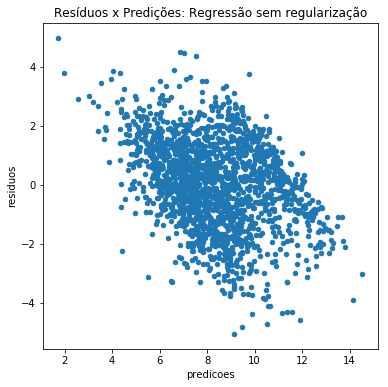

In [97]:
vis_residuos_vs_predicoes(y_pred_model_reg, y_test, "Resíduos x Predições: Regressão sem regularização")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95997414e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9599528cc0>]], dtype=object)

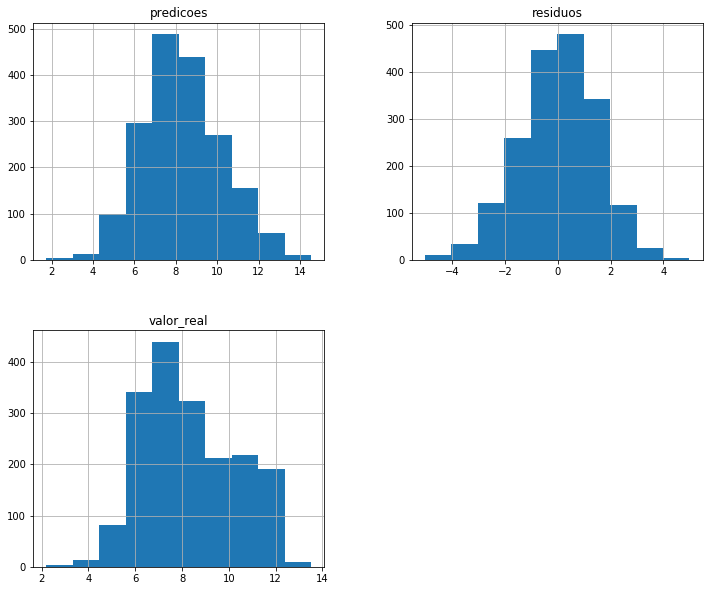

In [40]:
matplotlib.rcParams['figure.figsize'] = (12, 10)
predicoes.hist()

É possível identificar que grande parte dos resíduos estão dispostos em torno do 0 o que indica uma boa adequabilidade, mas ao olhar também o histograma é possível ver que os valores reais estão mais concentrados à direita, enquanto os valores das predições estão mais alinhados ao meio.

## Imports e definição de funções auxiliares

In [41]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

Função para calcular as métricas RMSE e R² do modelo com validação cruzada.

In [53]:
def calc_rmse(model, cv):
    rmse = np.sqrt(-cross_val_score(model, x_all, y_all, scoring="neg_mean_squared_error", cv=cv))
    print("RMSE is: {0} ".format(rmse))
    return rmse

In [54]:
def calc_r2(model, cv):
    r2 = np.sqrt(cross_val_score(model, x_all, y_all, scoring="r2", cv=cv))
    print("R² is: {0} ".format(r2))
    return r2

In [55]:
def calc_variance(model, cv):
    explained_variance = np.sqrt(cross_val_score(model, x_train, y_train, scoring="explained_variance", cv=cv))
    print("Variance is: {0} ".format(explained_variance))
    return explained_variance

Função para gerar visualização dos alphas x medidas de validação

In [76]:
def gerar_vis_validacao(measures, alphas, title_measure):
    matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
    data = pd.Series(measures, index=alphas)
    data.plot(title = "Validação")
    plt.xlabel("alpha")
    plt.ylabel(title_measure)

## 2 - Ridge
Atribuindo alguns valores para alfa e verificando como o RMSE se comporta

In [73]:
alphas = [0.2, 0.5, 2, 5, 7]
cv = 5

In [74]:
ridge_rmse = [calc_rmse(Ridge(alpha=alpha), cv).mean() 
            for alpha in alphas]

ridge_rmse

RMSE is: [ 0.94542671  0.91477244  0.98003962  0.96358065  0.90587968] 
RMSE is: [ 0.93779595  0.91187397  0.97762377  0.9628892   0.90424296] 
RMSE is: [ 0.93351704  0.91395143  0.97573539  0.96417145  0.90562284] 
RMSE is: [ 0.93491867  0.9170001   0.97513792  0.96592461  0.90776448] 
RMSE is: [ 0.93592515  0.9179763   0.9749089   0.96670571  0.90857776] 


[0.94193982108037777,
 0.93888517293436602,
 0.93859963029226168,
 0.94014915399176568,
 0.94081876469072001]

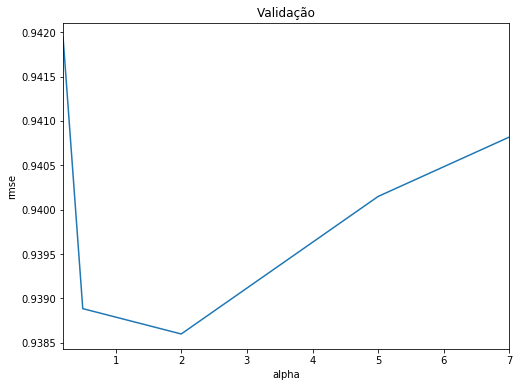

In [77]:
gerar_vis_validacao(ridge_rmse, alphas, "rmse")

In [78]:
ridge_r2 = [calc_r2(Ridge(alpha=alpha), cv).mean() 
            for alpha in alphas]

ridge_r2

R² is: [ 0.8795632   0.88227017  0.87046532  0.87738733  0.88305574] 
R² is: [ 0.88162964  0.88306438  0.87115034  0.87757551  0.88350579] 
R² is: [ 0.88277896  0.88249546  0.87168425  0.8772264   0.88312643] 
R² is: [ 0.88240323  0.88165756  0.87185289  0.87674812  0.88253619] 
R² is: [ 0.88213297  0.8813885   0.87191749  0.87653465  0.88231158] 


[0.87854835270785137,
 0.87938513207348623,
 0.87946230253377278,
 0.87903959749268223,
 0.87885704112741792]

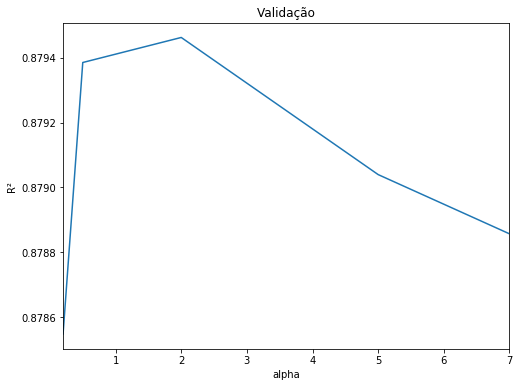

In [79]:
gerar_vis_validacao(ridge_r2, alphas, "R²")

In [80]:
ridge_variance = [calc_variance(Ridge(alpha=alpha), cv).mean() 
            for alpha in alphas]

ridge_variance

Variance is: [ 0.88302886  0.87104974  0.87045504  0.8802637   0.8635406 ] 
Variance is: [ 0.88380839  0.87172266  0.8713568   0.88152624  0.8646269 ] 
Variance is: [ 0.88485918  0.87229348  0.87145786  0.88271309  0.86527695] 
Variance is: [ 0.88492978  0.87207219  0.8714333   0.88307116  0.86542525] 
Variance is: [ 0.88469428  0.8718233   0.87134953  0.88305326  0.8654376 ] 


[0.87366759003042294,
 0.87460819662454858,
 0.87532011206342619,
 0.87538633416326062,
 0.87527159444230185]

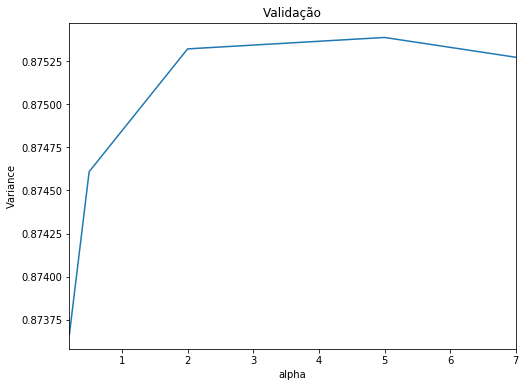

In [81]:
gerar_vis_validacao(ridge_variance, alphas, "Variance")

### Criando um modelo Ridge com o alfa que obteve o menor RMSE

In [82]:
model_ridge = Ridge(alpha=2)

model_ridge.fit(x_train, y_train)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [166]:
y_pred_model_ridge = model_ridge.predict(x_test)
y_pred_model_ridge

array([  7.08237092,   7.24481173,   8.95923006, ...,  11.59556633,
         6.83377208,   6.17855605])

### RMSE - Ridge

In [169]:
mse_ridge = mean_squared_error(y_test, y_pred_model_ridge)
mse_ridge

0.91263556592493766

In [168]:
np.sqrt(mse)

0.95531961454004366

## 2.1 - Resíduos x Predições: Ridge

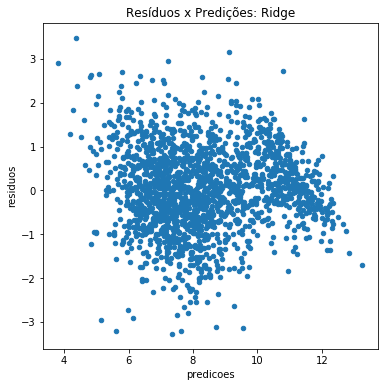

In [100]:
vis_residuos_vs_predicoes(y_pred_model_ridge, y_test, "Resíduos x Predições: Ridge")

Podemos observar que o modelo apresenta uma adaquabilidade melhor do que o modelo de regressão linear sem regularização, devido aos dados do resíduo estarem mais centralizados. Nos histogramas podemos observar que as predições conseguiram se aproximar melhor dos dados reais com relação a distribuição.

Text(0.5,1,'Distribuição dos Resíduos')

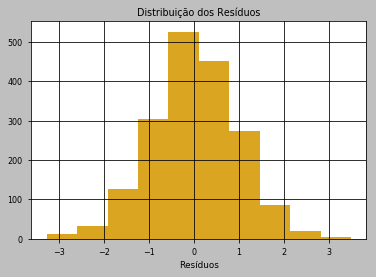

In [139]:
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)
residuos = y_test - y_pred_model_ridge
residuos.hist(color = "goldenrod")
plt.xlabel('Resíduos')
plt.title('Distribuição dos Resíduos')

Text(0.5,1,'Distribuição das Predições')

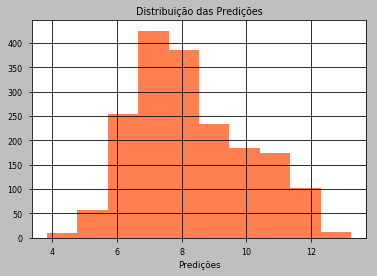

In [140]:
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)
pd.Series(y_pred_model_ridge).hist(color = "coral")
plt.xlabel('Predições')
plt.title('Distribuição das Predições')

Text(0.5,1,'Distribuição dos Valores Reais')

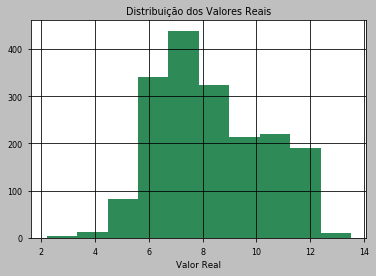

In [141]:
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)
pd.Series(y_test).hist(color = "seagreen")
plt.xlabel('Valor Real')
plt.title('Distribuição dos Valores Reais')

## 3 - Lasso

In [182]:
model_lasso = LassoCV(alphas=[1, 0.1, 0.001, 0.005], max_iter=3000).fit(x_train, y_train)

model_lasso

LassoCV(alphas=[1, 0.1, 0.001, 0.005], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=3000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

Verificando qual foi o alfa escolhido através da `cross validation`

In [183]:
model_lasso.alpha_

0.001

In [ ]:
calc_rmse(model_lasso, 3).mean()

In [ ]:
model_lasso.score(x_test, y_test)

In [ ]:
coef = pd.Series(model_lasso.coef_, index = x_train.columns)
print("Lasso selecionou " + str(sum(coeficientes != 0)) + " variáveis e rejeitou " + 
      str(sum(coeficientes == 0)) + " variáveis")

In [ ]:
descricao_coeficientes = pd.concat([coeficientes.sort_values().head(5),
                                   coeficientes.sort_values().tail(5)])

descricao_coeficientes

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
descricao_coeficientes.plot(kind= 'barh')
plt.title("Resumo de coeficientes considerados")

In [ ]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

predicoes = pd.DataFrame({"predicoes":model_lasso.predict(x_train), "true":y_train})
predicoes["residuos"] = predicoes["true"] - predicoes["predicoes"]
predicoes.plot(x = "predicoes", y = "residuos",kind = "scatter")

## Otimizando hiperâmetros para Lasso

In [ ]:
model_lasso = LassoCV(alphas=[1.5, 0.01, 0.05, 0.005], max_iter=3000).fit(x_train, y_train)

model_lasso

In [ ]:
model_lasso.alpha_

In [ ]:
calc_rmse(model_lasso, 5).mean()

## Regressão não paramétrica com o KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model_knn = KNeighborsRegressor(n_neighbors=3).fit(x_train, y_train)

In [ ]:
y_pred_model_knn = model_knn.predict(x_test)

In [ ]:
model_knn_1.score(x_test, y_test)

In [ ]:
T = np.linspace(0, 5, 500)[:, np.newaxis]

plt.scatter(x_test.sequencial_candidato, y_test, c='k', label='data')
plt.plot(T, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()

## Árvores de Regressão

## Importando dados das eleições de 2014

In [171]:
eleicoes_2014 = pd.read_csv('/home/lsp/dados/am/eleicoes_2014.csv')
eleicoes_2014[:3]

,ano,sq_candidato,nome_candidato,sigla_uf,sigla_partido,qtd_doacoes,qtd_doadores,total_receita,media_receita,recursos de outros candidatos/comitês,...,qtd_despesas,qtd_fornecedores,total_despesa,media_despesa,descricao_cargo,sexo,grau_instrucao,estado_civil,descricao_ocupacao,votos
0,2014,10000000135,EMERSON DA SILVA SANTOS,AC,PSOL,3,3,1580.00,526.666667,NaN,...,3,3,1580.00,526.666667,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",37
1,2014,10000000142,GERALDO SILVA DOS SANTOS,AC,PSOL,5,5,3180.00,636.000000,NaN,...,6,5,3130.02,626.004000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),VIGILANTE,383
2,2014,10000000158,CARLOS CESAR CORREIA DE MESSIAS,AC,PSB,40,38,333293.13,8770.871842,1923.07,...,145,139,326869.78,2351.581151,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),OUTROS,26448


In [172]:
numeric_features = eleicoes_2014.dtypes[eleicoes_2014.dtypes != "object"].index
skewed_features = eleicoes_2014[numeric_features].apply(lambda x: x.dropna().skew())
skewed_features = skewed_features[skewed_features > 0.75]
skewed_features = skewed_features.index

In [173]:
eleicoes_2014[skewed_features] = np.log1p(eleicoes_2014[skewed_features])
eleicoes_2014 = eleicoes_2014.fillna(eleicoes_2014.mean())
eleicoes_2014[numeric_features][:5]

,ano,sq_candidato,qtd_doacoes,qtd_doadores,total_receita,media_receita,recursos de outros candidatos/comitês,recursos de pessoas físicas,recursos de pessoas jurídicas,recursos próprios,qtd_despesas,qtd_fornecedores,total_despesa,media_despesa,votos
0,2014,10000000135,1.386294,1.386294,7.365813,6.268465,8.442226,7.313887,10.039024,8.505303,1.386294,1.386294,7.365813,6.268465,3.637586
1,2014,10000000142,1.791759,1.791759,8.064951,6.456770,8.442226,8.039480,10.039024,8.505303,1.945910,1.791759,8.049114,6.440953,5.950643
2,2014,10000000158,3.713572,3.663562,12.716781,9.079305,7.562198,11.092869,11.945818,11.652696,4.983607,4.941642,12.697320,7.763268,10.182974
3,2014,10000000161,3.401197,3.401197,11.962218,8.595101,10.574474,11.138739,9.741027,8.826758,4.919981,4.804021,12.392623,7.597330,9.199987
4,2014,10000000163,5.081404,4.990433,13.474546,8.491143,9.210440,12.757293,12.531776,11.264477,6.251904,5.872118,13.248824,7.380149,9.946403


In [176]:
eleicoes_2014 = pd.get_dummies(eleicoes)
eleicoes_2014 = eleicoes_2014.drop(['sequencial_candidato', 'media_receita', 'media_despesa'], axis=1)
eleicoes_2014.shape

(7330, 7035)

In [ ]:
y_pred_model_reg_eleicao_2014 = m

#### Retreino com 2006 e 2010

## Dentre os modelos avaliados, qual foi o que deu o melhor resultado nos dados de 2014 em termos de RMSE? 

Valores de RMSE:
- Sem regularização: 
- Ridge: 
- Ridge otimizado: 
- Lasso: 
- Lasso Otimizado: 
- KNN: 